# Notes

_______

## Probability Distributions


**Let's quickly recall what a probability distribution is:** Let $Z$ be some random variable. Then associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve. You can see examples in the first figure of this chapter. 

We can divide random variables into three classifications:

-   **$Z$ is discrete**: Discrete random variables may only assume values on a specified list. Things like populations, movie ratings, and number of votes are all discrete random variables. Discrete random variables become more clear when we contrast them with...

-   **$Z$ is continuous**: Continuous random variable can take on arbitrarily exact values. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.

- **$Z$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories. 

### Discrete Case
If $Z$ is discrete, then its distribution is called a *probability mass function*, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. Note that the probability mass function completely describes the random variable $Z$, that is, if we know the mass function, we know how $Z$ should behave. There are popular probability mass functions that consistently appear: we will introduce them as needed, but let's introduce the first very useful probability mass function. We say $Z$ is *Poisson*-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 

Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members. 

If a random variable $Z$ has a Poisson mass distribution, we denote this by writing

$$Z \sim \text{Poi}(\lambda) $$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

We will use this property often, so it's useful to remember. Below, we plot the probability mass distribution for different $\lambda$ values. The first thing to notice is that by increasing $\lambda$, we add more probability of larger values occurring. Second, notice that although the graph ends at 15, the distributions do not. They assign positive probability to every non-negative integer.

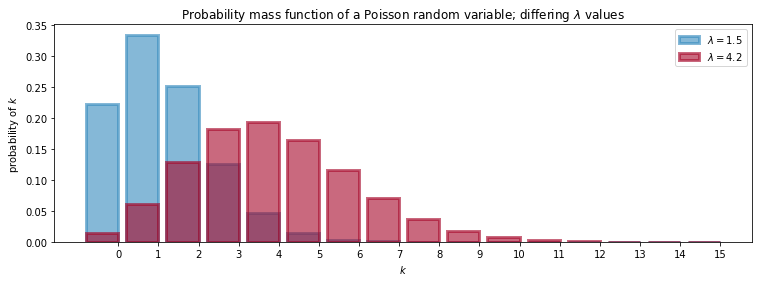

In [3]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


figsize(12.5, 4)

a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

### Continuous Case
Instead of a probability mass function, a continuous random variable has a *probability density function*. This might seem like unnecessary nomenclature, but the density function and the mass function are very different creatures. An example of continuous random variable is a random variable with *exponential density*. The density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Like a Poisson random variable, an exponential random variable can take on only non-negative values. But unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. This property makes it a poor choice for count data, which must be an integer, but a great choice for time data, temperature data (measured in Kelvins, of course), or any other precise *and positive* variable. The graph below shows two probability density functions with different $\lambda$ values. 

When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential* and write

$$Z \sim \text{Exp}(\lambda)$$

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

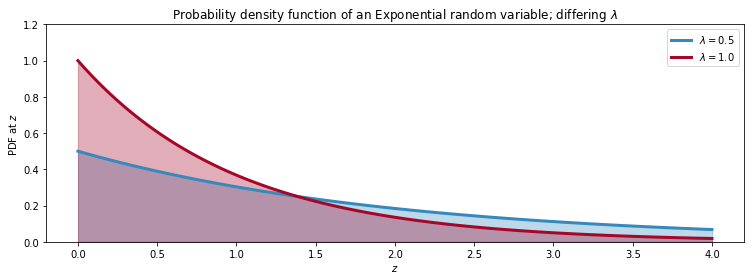

In [4]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

## Useful Priors

Also see the excellent PYMC3 docs on [distributions](http://docs.pymc.io/api/distributions.html) (e.g. [discrete](http://docs.pymc.io/api/distributions/discrete.html) and [continuous](http://docs.pymc.io/api/distributions/continuous.html)).

In [1]:
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

### Uniform

(_from chapter 6_)

These are usually objective because we don't use any prior knowledge to inform their shape. Aka uninformative. But they can be bounded, as below, which makes them subjective because we assume that they cannot take on all possible values.

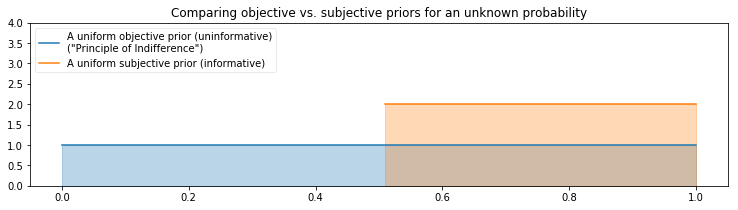

In [12]:
figsize(12.5,3)
#colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

x1 = np.linspace(0,1)
y1 = np.ones(len(x1))

x2 = x1[25:]
y2 = 2*np.ones(25)
#y1 = stats.beta.pdf(x, 1,1)

p = plt.plot(x1, y1, 
    label='A uniform objective prior (uninformative)\n("Principle of Indifference")')
plt.fill_between(x1, 0, y1, color = p[0].get_color(), alpha = 0.3)

p = plt.plot(x2, y2, label = "A uniform subjective prior (informative)")
plt.fill_between(x2, 0, 2, color = p[0].get_color(), alpha = 0.3)

plt.ylim(0, 4)
leg = plt.legend(loc = "upper left")
leg.get_frame().set_alpha(0.4)
plt.title("Comparing objective vs. subjective priors for an unknown probability");

### Poisson (discrete)

(_from Chapter 1_)

*__A discrete distribution with parameter $\lambda$ that assigns a probability to every non-negative integer. Good for count data.__*

We say $Z$ is *Poisson*-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 

Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members. 

If a random variable $Z$ has a Poisson mass distribution, we denote this by writing

$$Z \sim \text{Poi}(\lambda) $$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

We will use this property often, so it's useful to remember. Below, we plot the probability mass distribution for different $\lambda$ values. The first thing to notice is that by increasing $\lambda$, we add more probability of larger values occurring. Second, notice that although the graph ends at 15, the distributions do not. They assign positive probability to every non-negative integer.

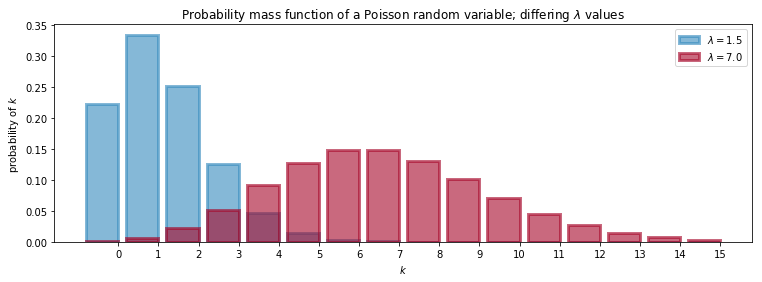

In [4]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 7]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

### Binomial (discrete)

(_from chapter 2_)

*__A discrete distribution, but (ulike Poisson) only weights integers from $0$ to $N$.__*

The binomial distribution is one of the most popular distributions, mostly because of its simplicity and usefulness. Unlike the other distributions we have encountered thus far in the book, the binomial distribution has 2 parameters: $N$, a positive integer representing $N$ trials or number of instances of potential events, and $p$, the probability of an event occurring in a single trial. Like the Poisson distribution, it is a discrete distribution, but unlike the Poisson distribution, it only weighs integers from $0$ to $N$. The mass distribution looks like:

$$P( X = k ) =  {{N}\choose{k}}  p^k(1-p)^{N-k}$$

If $X$ is a binomial random variable with parameters $p$ and $N$, denoted $X \sim \text{Bin}(N,p)$, then $X$ is the number of events that occurred in the $N$ trials (obviously $0 \le X \le N$). The larger $p$ is (while still remaining between 0 and 1), the more events are likely to occur. The expected value of a binomial is equal to $Np$. Below we plot the mass probability distribution for varying parameters. 


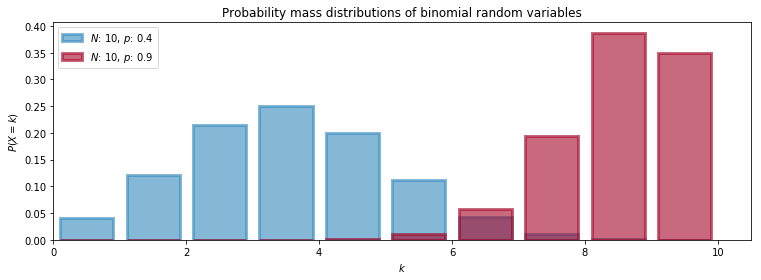

In [15]:
figsize(12.5, 4)

import scipy.stats as stats
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
            edgecolor=colors[i],
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)

plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of binomial random variables");

### Exponential (continuous)

(_from chapter 1_)

**_Like Poisson, but can take on any non-negative value. Good for continuous, positive data (not counts)._**

The density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Like a Poisson random variable, an exponential random variable can take on only non-negative values. But unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. This property makes it a poor choice for count data, which must be an integer, but a great choice for time data, temperature data (measured in Kelvins, of course), or any other precise *and positive* variable. The graph below shows two probability density functions with different $\lambda$ values. 

When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential* and write

$$Z \sim \text{Exp}(\lambda)$$

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

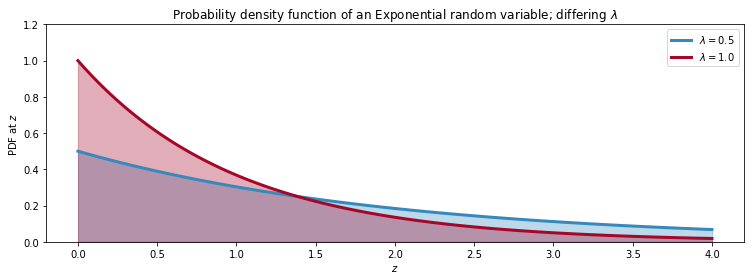

In [5]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

### Normal (continuous)

(_from Chapter 2_)

**_Continuous and can take on negative values as well as positive_**

A Normal random variable, denoted $X \sim N(\mu, 1/\tau)$, has a distribution with two parameters: the mean, $\mu$, and the *precision*, $\tau$. Those familiar with the Normal distribution already have probably seen $\sigma^2$ instead of $\tau^{-1}$. They are in fact reciprocals of each other. The change was motivated by simpler mathematical analysis and is an artifact of older Bayesian methods. Just remember: the smaller $\tau$, the larger the spread of the distribution (i.e. we are more uncertain); the larger $\tau$, the tighter the distribution (i.e. we are more certain). Regardless, $\tau$ is always positive. 

The probability density function of a $N( \mu, 1/\tau)$ random variable is:

$$ f(x | \mu, \tau) = \sqrt{\frac{\tau}{2\pi}} \exp\left( -\frac{\tau}{2} (x-\mu)^2 \right) $$

We plot some different density functions below. 

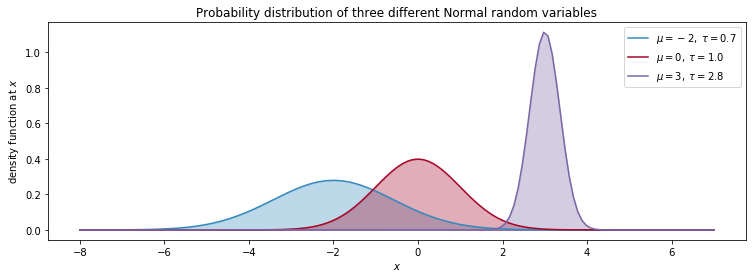

In [6]:
import scipy.stats as stats

nor = stats.norm
x = np.linspace(-8, 7, 150)
mu = (-2, 0, 3)
tau = (.7, 1, 2.8)
colors = ["#348ABD", "#A60628", "#7A68A6"]
parameters = zip(mu, tau, colors)

for _mu, _tau, _color in parameters:
    plt.plot(x, nor.pdf(x, _mu, scale=1./_tau),
             label="$\mu = %d,\;\\tau = %.1f$" % (_mu, _tau), color=_color)
    plt.fill_between(x, nor.pdf(x, _mu, scale=1./_tau), color=_color,
                     alpha=.33)

plt.legend(loc="upper right")
plt.xlabel("$x$")
plt.ylabel("density function at $x$")
plt.title("Probability distribution of three different Normal random \
variables");

### Gamma (continuous)

(_from chapter 6_)

A Gamma random variable, denoted $X \sim \text{Gamma}(\alpha, \beta)$, is a random *__variable over the positive real numbers__*. It is in fact a generalization of the Exponential random variable, that is:

$$ \text{Exp}(\beta) \sim \text{Gamma}(1, \beta) $$

This additional parameter allows the probability density function to have more flexibility, hence allowing the practitioner to express his or her subjective priors more accurately. The density function for a $\text{Gamma}(\alpha, \beta)$ random variable is:

$$ f(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} $$

where $\Gamma(\alpha)$ is the [Gamma function](http://en.wikipedia.org/wiki/Gamma_function), and for differing values of $(\alpha, \beta)$ looks like:

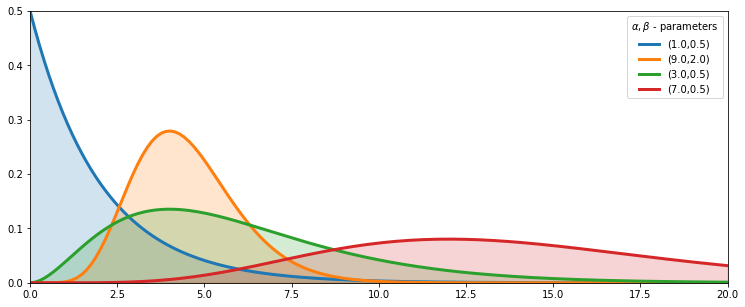

In [9]:
figsize(12.5, 5)
gamma = stats.gamma

parameters = [(1, 0.5), (9, 2), (3, 0.5), (7, 0.5)]
x = np.linspace(0.001 ,20, 150)
for alpha, beta in parameters:
    y = gamma.pdf(x, alpha, scale=1./beta)
    lines = plt.plot(x, y, label = "(%.1f,%.1f)"%(alpha,beta), lw = 3)
    plt.fill_between(x, 0, y, alpha = 0.2, color = lines[0].get_color())
    plt.autoscale(tight=True)
    
plt.legend(title=r"$\alpha, \beta$ - parameters");

### Beta (continuous)

(_from chapter 6_)

**_Used to define variables between 0 and 1, so good for probabilities and proportions._**

You may have seen the term `beta` in previous code in this book. Often, I was implementing a Beta distribution. The Beta distribution is very useful in Bayesian statistics. A random variable $X$ has a $\text{Beta}$ distribution, with parameters $(\alpha, \beta)$, if its density function is:

$$f_X(x | \; \alpha, \beta ) = \frac{ x^{(\alpha - 1)}(1-x)^{ (\beta - 1) } }{B(\alpha, \beta) }$$

where $B$ is the [Beta function](http://en.wikipedia.org/wiki/Beta_function) (hence the name). The random variable $X$ is only allowed in [0,1], making the Beta distribution a popular distribution for decimal values, probabilities and proportions. The values of $\alpha$ and $\beta$, both positive values, provide great flexibility in the shape of the distribution. Below we plot some distributions:

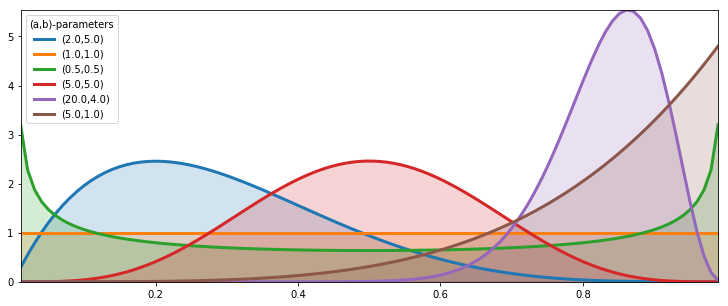

In [8]:
figsize(12.5, 5)

params = [(2, 5), (1, 1), (0.5, 0.5), (5, 5), (20, 4), (5, 1)]

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label = "(%.1f,%.1f)"%(a,b), lw = 3)
    plt.fill_between(x, 0, y, alpha = 0.2, color = lines[0].get_color())
    plt.autoscale(tight=True)
plt.ylim(0)
plt.legend(loc = 'upper left', title="(a,b)-parameters");

### Wishart Distribution

(_from chapter 6_)

**_For radom matricies, rather than random scalar variables_**

Until now, we have only seen random variables that are scalars. Of course, we can also have *random matrices*! Specifically, the Wishart distribution is a distribution over all [positive semi-definite matrices](http://en.wikipedia.org/wiki/Positive-definite_matrix). Why is this useful to have in our arsenal? (Proper) covariance matrices are positive-definite, hence the Wishart is an appropriate prior for covariance matrices. We can't really visualize a distribution of matrices, so I'll plot some realizations from the $5 \times 5$ (above) and $20 \times 20$ (below) Wishart distribution:

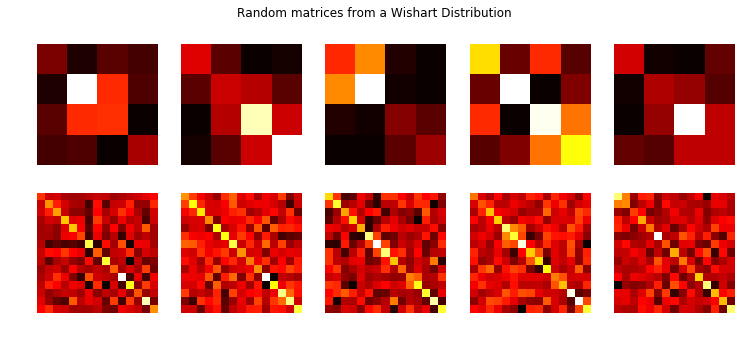

In [7]:

n = 4
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    if i >= 5:
        n = 15
    plt.imshow(stats.wishart.rvs(n+1, np.eye(n)), interpolation="none", 
                cmap = "hot")
    ax.axis("off")
    
plt.suptitle("Random matrices from a Wishart Distribution");